### Coleta dados

In [208]:
!pip install pandas

In [209]:
!pip install matplotlib

In [210]:
!pip install seaborn

In [211]:
!pip install scipy

In [212]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [213]:
df = pd.read_csv('SofwareDeveloperIncomeExpensesperUSACity.csv')
df.head(3)

,Unnamed: 0,Metro,Mean Software Developer Salary (adjusted),Mean Software Developer Salary (unadjusted),Mean Unadjusted Salary (all occupations),Number of Software Developer Jobs,Median Home Price,City,Cost of Living avg,Rent avg,Cost of Living Plus Rent avg,Local Purchasing Power avg
0,0,"Columbus, OH",117552.0,108500.0,51260.0,13430.0,192000.0,"Columbus, OH",984.8,1421.5,2856.5,9335.4
1,1,"Seattle-Tacoma-Bellevue, WA",117323.0,131167.0,65400.0,65760.0,491600.0,"Seattle, WA",1250.7,2528.2,4091.5,8971.3
2,2,"Charlotte-Concord-Gastonia, NC-SC",114122.0,107046.0,51000.0,12800.0,208500.0,"Charlotte, NC",989.9,1974.5,3221.1,8939.8


### Retirando colunas:
* "Unnamed: 0", 
* "Metro", 
* "Mean Unadjusted Salary (all occupations)", 
* "Mean Software Developer Salary (adjusted)", 
* "Cost of Living Plus Rent avg"

In [214]:
colunas_para_retirar = ['Unnamed: 0', 
                        'Metro', 
                        'Mean Unadjusted Salary (all occupations)', 
                        'Mean Software Developer Salary (adjusted)', 
                        'Cost of Living Plus Rent avg',
                        'City']
df_final = df.drop(colunas_para_retirar, axis=1)
df_final.head(3)


,Mean Software Developer Salary (unadjusted),Number of Software Developer Jobs,Median Home Price,Cost of Living avg,Rent avg,Local Purchasing Power avg
0,108500.0,13430.0,192000.0,984.8,1421.5,9335.4
1,131167.0,65760.0,491600.0,1250.7,2528.2,8971.3
2,107046.0,12800.0,208500.0,989.9,1974.5,8939.8


## Renomeando e traduzindo Colunas
### ** Como todas as colunas númericas sao médias vamos ocultar essa informação.

### Os novos nomes das colunas serão:
![image](DeparaTraducao.png)

In [215]:
de_para_novos_nomes = {
    'Mean Software Developer Salary (unadjusted)'   : 'vl_salario',
    'Number of Software Developer Jobs'             : 'nr_empregos',
    'Median Home Price'                             : 'vl_moradia',
    # 'City'                                          : 'nm_cidade',
    'Cost of Living avg'                            : 'vl_custo_vida',
    'Rent avg'                                      : 'vl_aluguel',
    'Local Purchasing Power avg'                    : 'vl_poder_compra'
}
df_final.rename(columns=de_para_novos_nomes, inplace=True)
df_final.head(3)

,vl_salario,nr_empregos,vl_moradia,vl_custo_vida,vl_aluguel,vl_poder_compra
0,108500.0,13430.0,192000.0,984.8,1421.5,9335.4
1,131167.0,65760.0,491600.0,1250.7,2528.2,8971.3
2,107046.0,12800.0,208500.0,989.9,1974.5,8939.8


# Avaliação dos dados

In [216]:
print('O conjunto de dados tem ' + str(df_final.shape[0]) + ' linhas/observações e ' + str(df_final.shape[1]) + ' colunas/variáveis.') 

O conjunto de dados tem 77 linhas/observações e 6 colunas/variáveis.


In [217]:
print('Verificando valores nulos')
df_final.isna().sum()

Verificando valores nulos


vl_salario         0
nr_empregos        0
vl_moradia         0
vl_custo_vida      0
vl_aluguel         0
vl_poder_compra    0
dtype: int64

In [218]:
print('Tipos de dados das colunas')
df_final.dtypes

Tipos de dados das colunas


vl_salario         float64
nr_empregos        float64
vl_moradia         float64
vl_custo_vida      float64
vl_aluguel         float64
vl_poder_compra    float64
dtype: object

In [219]:
 # Retirando nome da cidade, por não ser possível correlacionar variáveis descritivas.
df_final.corr()
print('Notas observações:  \n\t* As variáveis com maior correlação com o salário são "nr_empregos" e "vl_moradia".\n' + 
                            '\t* As variáveis "vl_custo_vida", "vl_poder_compra" demonstraram menor correlação em relação ao salário.\n'
                            '\t* A variável "vl_aluguel" teve baixíssima correlação e apresentando-se negativa.\n')

,vl_salario,nr_empregos,vl_moradia,vl_custo_vida,vl_aluguel,vl_poder_compra
vl_salario,1.000000,0.784464,0.785842,0.152999,-0.019006,0.349720
nr_empregos,0.784464,1.000000,0.652009,0.170448,-0.021038,0.339211
vl_moradia,0.785842,0.652009,1.000000,0.126911,-0.019267,0.199677
vl_custo_vida,0.152999,0.170448,0.126911,1.000000,-0.017873,-0.002585
vl_aluguel,-0.019006,-0.021038,-0.019267,-0.017873,1.000000,-0.009309
vl_poder_compra,0.349720,0.339211,0.199677,-0.002585,-0.009309,1.000000


Notas observações:  
	* As variáveis com maior correlação com o salário são "nr_empregos" e "vl_moradia".
	* As variáveis "vl_custo_vida", "vl_poder_compra" demonstraram menor correlação em relação ao salário.
	* A variável "vl_aluguel" teve baixíssima correlação e apresentando-se negativa.



In [220]:
print('Tabela descritiva das variáveis:')
df_final.describe().round(2)

Tabela descritiva das variáveis:


,vl_salario,nr_empregos,vl_moradia,vl_custo_vida,vl_aluguel,vl_poder_compra
count,77.00,77.00,77.00,77.00,77.00,77.00
mean,101866.21,19098.57,312701.30,1414.06,3280.43,7421.23
std,13926.64,23858.15,222743.31,2369.54,9118.81,1327.44
min,80314.00,1120.00,124100.00,832.50,879.30,4840.10
25%,91976.00,3170.00,178400.00,957.30,1340.50,6464.20
50%,100614.00,8770.00,243700.00,995.00,1625.80,7499.00
75%,109503.00,21160.00,366000.00,1086.00,2171.90,8153.10
max,142101.00,98650.00,1193600.00,15809.20,58597.60,10673.70


Aqui podemos visualizar melhor os OUTLIERS.


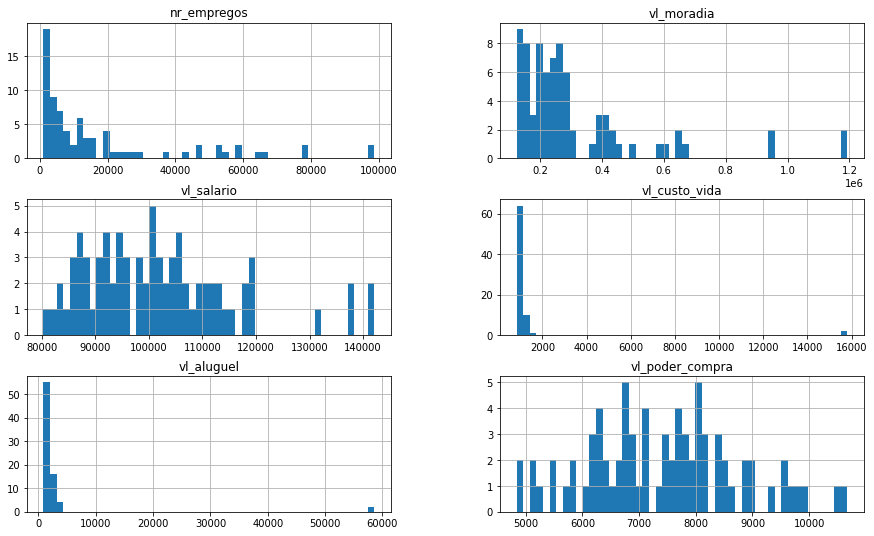

In [221]:
#Histograma das variáveis
df_final[['nr_empregos', 'vl_moradia', 'vl_salario', 'vl_custo_vida', 'vl_aluguel', 'vl_poder_compra']].hist(figsize=(15,9), bins=50);
print('Aqui podemos visualizar melhor os OUTLIERS.');

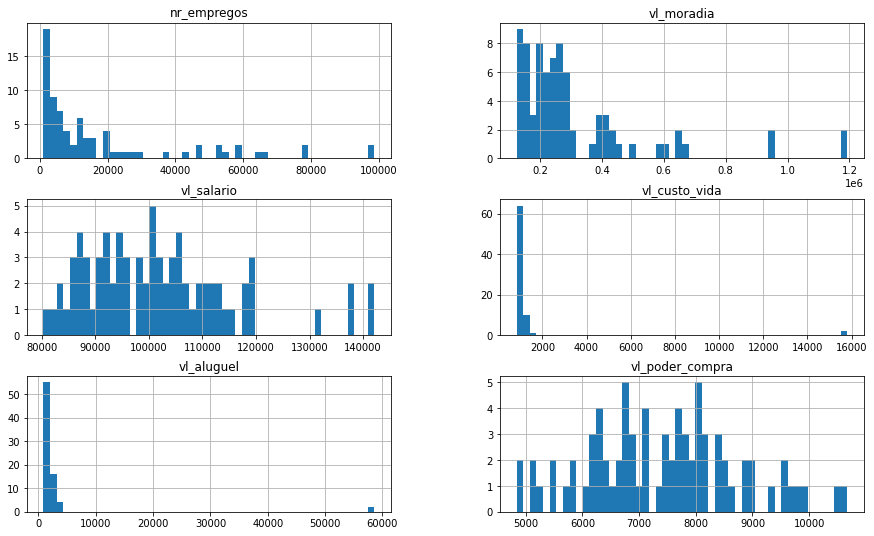

In [222]:
df_final[['nr_empregos', 'vl_moradia', 'vl_salario', 'vl_custo_vida', 'vl_aluguel', 'vl_poder_compra']].hist(figsize=(15,9), bins=50);

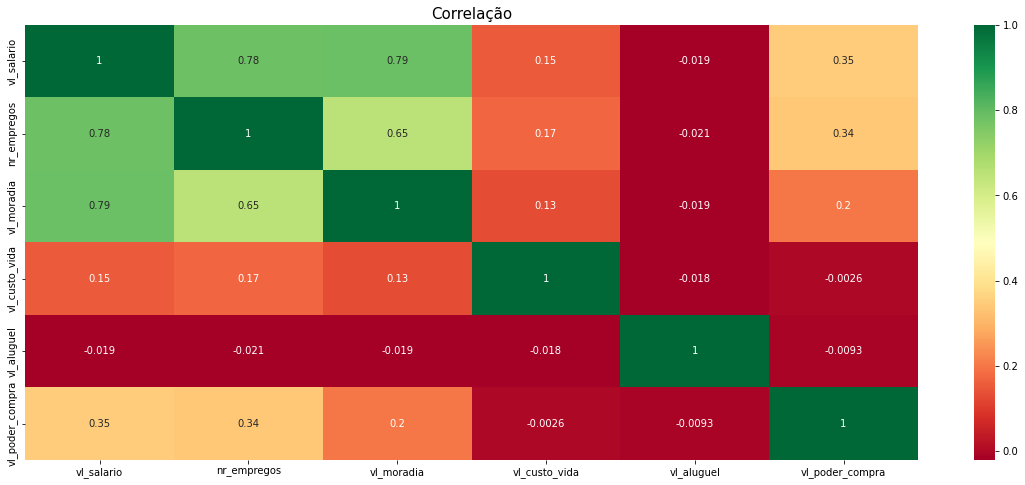

In [223]:
plt.figure(figsize=(20,8))
sns.heatmap(df_final.corr(), annot = True, cmap= "RdYlGn");
plt.title('Correlação',size=15);

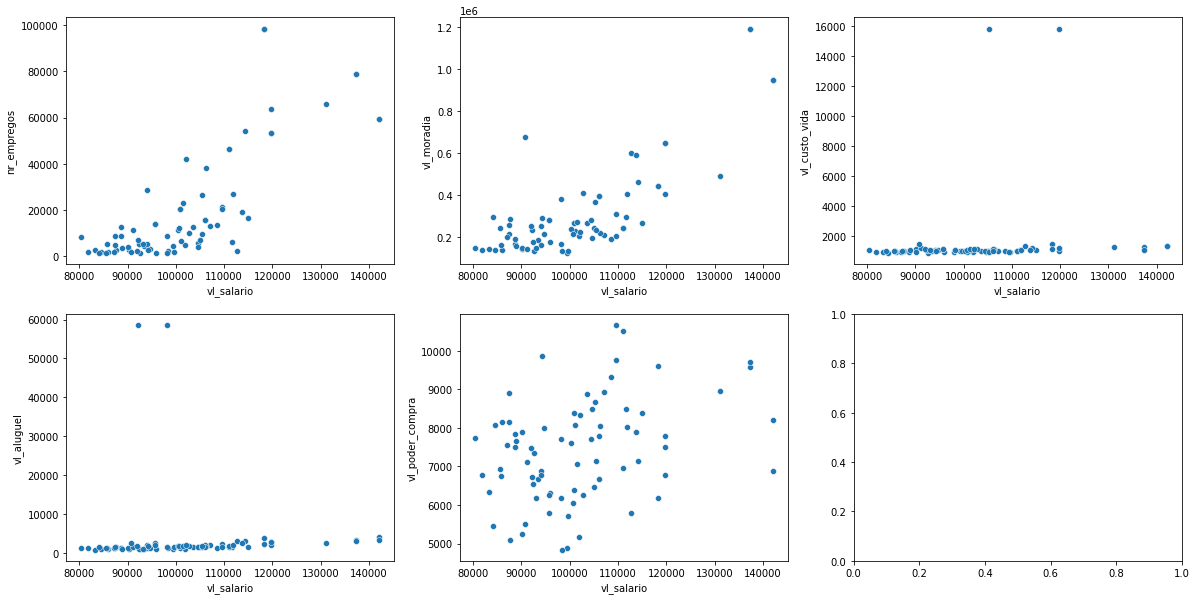

In [224]:
#Dispersão entre as variáveis
fig,ax = plt.subplots(2,3, figsize=(20,10));
sns.scatterplot(x='vl_salario',y='nr_empregos',data = df_final,ax=ax[0][0]);
sns.scatterplot(x='vl_salario',y='vl_moradia',data = df_final,ax=ax[0][1]);
sns.scatterplot(x='vl_salario',y='vl_custo_vida',data = df_final,ax=ax[0][2]);
sns.scatterplot(x='vl_salario',y='vl_aluguel',data = df_final,ax=ax[1][0]);
sns.scatterplot(x='vl_salario',y='vl_poder_compra',data = df_final,ax=ax[1][1]);

# Escolhemos trabalhar com somente as variáveis "nr_empregos" e "vl_moradia" para estimar o salário

## Removendo outras colunas

In [225]:
df_final = df_final.drop(['vl_custo_vida', 'vl_aluguel', 'vl_poder_compra'], axis=1)
df_final.head(3)

,vl_salario,nr_empregos,vl_moradia
0,108500.0,13430.0,192000.0
1,131167.0,65760.0,491600.0
2,107046.0,12800.0,208500.0


# ** Separar variáveis independentes e variáveis dependentes